201812 2018 evaluation vs GRL dataset

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [4]:
from __future__ import print_function
from numpy import *
from scipy import *
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import scipy as sp
import cmocean
import glob
import seawater
""
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)

%matplotlib inline
import pickle

In [5]:
##changeable variables


## PSU to reference salinity
SR = (35.16504/35) g kg–1 * S

In [6]:
infil = loadtxt('/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/DATASETS/grl2016_edit2.txt')
infil_cor = loadtxt('/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/DATASETS/grl2016_nu.txt')

In [7]:
crid= infil[:,0]
ln = infil[:,2]
stn = infil[:,3]
mon = infil[:,4]
day = infil[:,5]
lat_or = infil[:,6]
lon_or = infil[:,7]
lat = infil_cor[:,6]
lon = infil_cor[:,7]
P = infil[:,8]
T = infil[:,9]
S = infil[:,10]
ox = infil[:,11]
ox_qf = infil[:,12]
dic = infil[:,13]
alk = infil[:,15]
dic_qf = infil[:,14]
alk_qf = infil[:,16]
no3 = infil[:,17]
no3_qf = infil[:,18]
si = infil[:,19]
si_qf = infil[:, 20]
po4 = infil[:,21]
po4_qf = infil[:, 22]



 Reference Salinity of
the local seawater sample is then determined from the
Practical Salinity according to the simple formula
SR = (35.16504/35) g kg–1  S.

In [8]:
len(no3)

860

In [9]:
dens = seawater.dens(S,T,P)
dic_conv=dic*dens/1000
alk_conv=alk*dens/1000

S_rs = S * 35.16504/35

In [10]:
S_psu= S_rs*35/35.16504

# DIC, year 2007-17

In [11]:
yrs = np.arange(2007,2018,1)
DIC_WSS = np.zeros(11)
DIC_RMSE = np.zeros(11)
DIC_bias = np.zeros(11)
DIC_modstd = np.zeros(11)
DIC_obsstd = np.zeros(11)

DIC_WSS_over1800 = np.zeros(11)
DIC_RMSE_over1800 = np.zeros(11)
DIC_bias_over1800 = np.zeros(11)
DIC_modstd_over1800 = np.zeros(11)
DIC_obsstd_over1800 = np.zeros(11)

In [12]:
for yr in range(2007,2018):
    index = yr - 2007
    print(yr)
    tyr = str(yr)
    scrdir = './MODEL_EVAL_scripts/'
    DIC = nc.Dataset(scrdir+'/DIC_hindcast201905_GRL_comp_' + str(yr) + '.nc')

    #extractions
    DIC_mod = DIC['model_output']['mod_point'][:]
    is_ref = DIC['model_output']['mod_x'][:]
    js_ref = DIC['model_output']['mod_y'][:]


    #locations 
    loc_tag = np.zeros_like(dic)
    loc_tag[:] = 4

    for w in range(0,len(loc_tag)):
        x = is_ref[w]
        y = js_ref[w]
        #jdf is 1
        if  (x <200) & (y>220) & (y<500) :
            loc_tag[w] = 1
            #n strait
        if  (y >= 550):
            loc_tag[w] = 2
            #central strait
        if (x> 150) & (y>380) & (y<550):
            loc_tag[w] = 3
            #4 is haro/puget
        if ((x>150) & (y>320) & (y<370)):
            loc_tag[w] =4

    DIC_mod[DIC_mod==0]=np.nan

    #DIC
    dic_jdf=dic_conv[~(np.isnan(DIC_mod))&(loc_tag==1)]
    dic_haro=dic_conv[~(np.isnan(DIC_mod))&(loc_tag==4)]
    dic_ns =dic_conv[~(np.isnan(DIC_mod))&(loc_tag==2)]
    dic_cs=dic_conv[~(np.isnan(DIC_mod))&(loc_tag==3)]

    dic_MODjdf=DIC_mod[~(np.isnan(DIC_mod))&(loc_tag==1)]
    dic_MODharo=DIC_mod[~(np.isnan(DIC_mod))&(loc_tag==4)]
    dic_MODns =DIC_mod[~(np.isnan(DIC_mod))&(loc_tag==2)]
    dic_MODcs=DIC_mod[~(np.isnan(DIC_mod))&(loc_tag==3)]

    dic_compbl = dic_conv[~(np.isnan(DIC_mod))]
    DIC_mod_compbl = DIC_mod[~(np.isnan(DIC_mod))]



    obs =dic_compbl
    mod = DIC_mod_compbl
    print('metrics calculated on FULL DATASET')
    print('bias =  ' + str(-np.mean(obs) + np.mean(mod)))
    print('RMSE = ' + str(np.sqrt(np.sum((mod - obs)**2) /
                                  len(obs))))
    xbar = np.mean(obs)
    print('Willmott = ' + str(1-(np.sum((mod - obs)**2)  / 
                                 np.sum((np.abs(mod - xbar) 
                                         + np.abs(obs - xbar))**2))))
    
    DIC_bias[index] = (-np.mean(obs) + np.mean(mod))
    DIC_RMSE[index] = (np.sqrt(np.sum((mod - obs)**2) /len(obs)))
    DIC_WSS[index] = (1-(np.sum((mod - obs)**2)  / np.sum((np.abs(mod - xbar) + np.abs(obs - xbar))**2)))
    DIC_modstd[index] = np.std(mod)
    DIC_obsstd[index] = np.std(obs)
    
    obs =dic_compbl[dic_compbl>1800]
    mod = DIC_mod_compbl[dic_compbl>1800]
    print('metrics calculated on dataset>1800')
    print('bias =  ' + str(-np.mean(obs) + np.mean(mod)))
    print('RMSE = ' + str(np.sqrt(np.sum((mod - obs)**2) /
                                  len(obs))))
    xbar = np.mean(obs)
    print('Willmott = ' + str(1-(np.sum((mod - obs)**2)  / 
                                 np.sum((np.abs(mod - xbar) 
                                         + np.abs(obs - xbar))**2))))

    DIC_bias_over1800[index] = (-np.mean(obs) + np.mean(mod))
    DIC_RMSE_over1800[index] = (np.sqrt(np.sum((mod - obs)**2) /len(obs)))
    DIC_WSS_over1800[index] = (1-(np.sum((mod - obs)**2)  / np.sum((np.abs(mod - xbar) + np.abs(obs - xbar))**2)))
    DIC_modstd_over1800[index] = np.std(mod)
    DIC_obsstd_over1800[index] = np.std(obs)
    
    print('')
    
##can optionally count this by region
#     obs =dic_jdf
#     mod = dic_MODjdf
#     print()
#     print('metrics calculated on JdF data')
#     print('bias =  ' + str(-np.mean(obs) + np.mean(mod)))
#     print('RMSE = ' + str(np.sqrt(np.sum((mod - obs)**2) /
#                                   len(obs))))
#     xbar = np.mean(obs)
#     print('Willmott = ' + str(1-(np.sum((mod - obs)**2)  / 
#                                  np.sum((np.abs(mod - xbar) 
#                                          + np.abs(obs - xbar))**2))))

#     obs =dic_haro
#     mod = dic_MODharo
#     print()
#     print('metrics calculated on Haro data')
#     print('bias =  ' + str(-np.mean(obs) + np.mean(mod)))
#     print('RMSE = ' + str(np.sqrt(np.sum((mod - obs)**2) /
#                                   len(obs))))
#     xbar = np.mean(obs)
#     print('Willmott = ' + str(1-(np.sum((mod - obs)**2)  / 
#                                  np.sum((np.abs(mod - xbar) 
#                                          + np.abs(obs - xbar))**2))))

#     obs =dic_cs
#     mod = dic_MODcs
#     print()
#     print('metrics calculated on CS data')
#     print('bias =  ' + str(-np.mean(obs) + np.mean(mod)))
#     print('RMSE = ' + str(np.sqrt(np.sum((mod - obs)**2) /
#                                   len(obs))))
#     xbar = np.mean(obs)
#     print('Willmott = ' + str(1-(np.sum((mod - obs)**2)  / 
#                                  np.sum((np.abs(mod - xbar) 
#                                          + np.abs(obs - xbar))**2))))

#     obs =dic_ns
#     mod = dic_MODns
#     print()
#     print('metrics calculated on NS data')
#     print('bias =  ' + str(-np.mean(obs) + np.mean(mod)))
#     print('RMSE = ' + str(np.sqrt(np.sum((mod - obs)**2) /
#                                   len(obs))))
#     xbar = np.mean(obs)
#     print('Willmott = ' + str(1-(np.sum((mod - obs)**2)  / 
#                                  np.sum((np.abs(mod - xbar) 
#                                          + np.abs(obs - xbar))**2))))

#     obs =dic_jdf[dic_jdf>1800]
#     mod = dic_MODjdf[dic_jdf>1800]
#     print()
#     print('metrics calculated on JdF data (>1800)')
#     print('bias =  ' + str(-np.mean(obs) + np.mean(mod)))
#     print('RMSE = ' + str(np.sqrt(np.sum((mod - obs)**2) /
#                                   len(obs))))
#     xbar = np.mean(obs)
#     print('Willmott = ' + str(1-(np.sum((mod - obs)**2)  / 
#                                  np.sum((np.abs(mod - xbar) 
#                                          + np.abs(obs - xbar))**2))))

#     obs =dic_haro[dic_haro>1800]
#     mod = dic_MODharo[dic_haro>1800]
#     print()
#     print('metrics calculated on Haro data (>1800)')
#     print('bias =  ' + str(-np.mean(obs) + np.mean(mod)))
#     print('RMSE = ' + str(np.sqrt(np.sum((mod - obs)**2) /
#                                   len(obs))))
#     xbar = np.mean(obs)
#     print('Willmott = ' + str(1-(np.sum((mod - obs)**2)  / 
#                                  np.sum((np.abs(mod - xbar) 
#                                          + np.abs(obs - xbar))**2))))

#     obs =dic_cs[dic_cs>1800]
#     mod = dic_MODcs[dic_cs>1800]
#     print()
#     print('metrics calculated on CS data (>1800)')
#     print('bias =  ' + str(-np.mean(obs) + np.mean(mod)))
#     print('RMSE = ' + str(np.sqrt(np.sum((mod - obs)**2) /
#                                   len(obs))))
#     xbar = np.mean(obs)
#     print('Willmott = ' + str(1-(np.sum((mod - obs)**2)  / 
#                                  np.sum((np.abs(mod - xbar) 
#                                          + np.abs(obs - xbar))**2))))

#     obs =dic_ns[dic_ns>1800]
#     mod = dic_MODns[dic_ns>1800]
#     print()
#     print('metrics calculated on NS data (>1800)')
#     print('bias =  ' + str(-np.mean(obs) + np.mean(mod)))
#     print('RMSE = ' + str(np.sqrt(np.sum((mod - obs)**2) /
#                                   len(obs))))
#     xbar = np.mean(obs)
#     print('Willmott = ' + str(1-(np.sum((mod - obs)**2)  / 
#                                  np.sum((np.abs(mod - xbar) 
#                                          + np.abs(obs - xbar))**2))))


2007
metrics calculated on FULL DATASET
bias =  -28.53237239958571
RMSE = 72.59157918961972
Willmott = 0.9415419790727573
metrics calculated on dataset>1800
bias =  -37.01224756748479
RMSE = 59.33885839097642
Willmott = 0.9078323823271117

2008
metrics calculated on FULL DATASET
bias =  -31.86953060271071
RMSE = 82.01239206123364
Willmott = 0.9216975505082037
metrics calculated on dataset>1800
bias =  -42.82547998935979
RMSE = 64.89567972166728
Willmott = 0.8942527869453628

2009
metrics calculated on FULL DATASET
bias =  -28.95449154021071
RMSE = 81.42339449411723
Willmott = 0.9241781797910679
metrics calculated on dataset>1800
bias =  -39.55985498935979
RMSE = 59.05373508876517
Willmott = 0.910855843637946

2010
metrics calculated on FULL DATASET
bias =  -44.04763118864821
RMSE = 88.16071910287648
Willmott = 0.9081795187907317
metrics calculated on dataset>1800
bias =  -56.68180323154729
RMSE = 70.59775113766051
Willmott = 0.8817565559523135

2011
metrics calculated on FULL DATASET
b

2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017


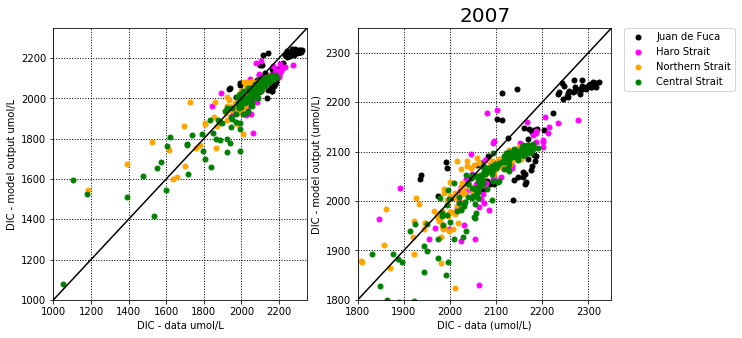

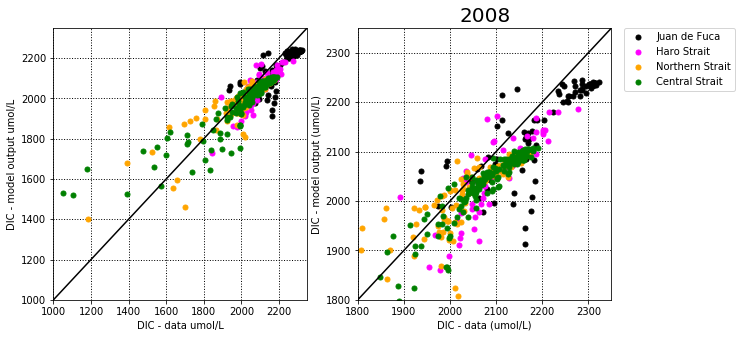

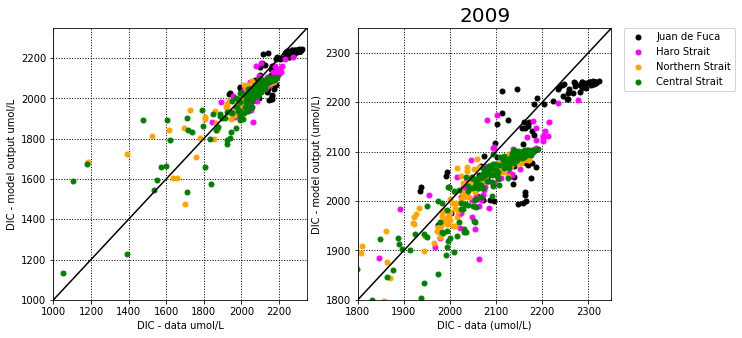

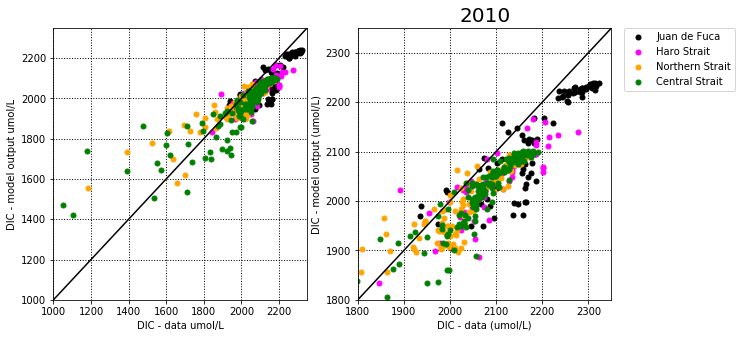

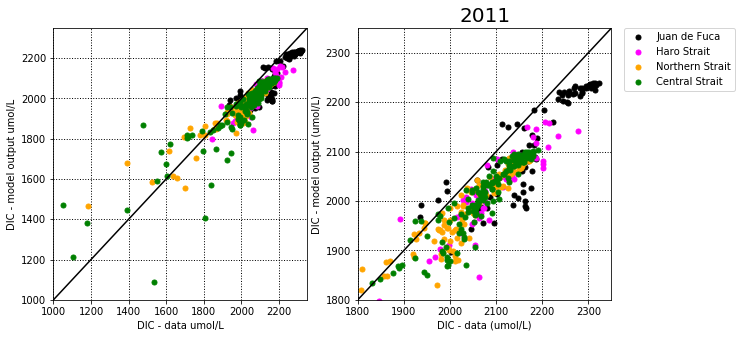

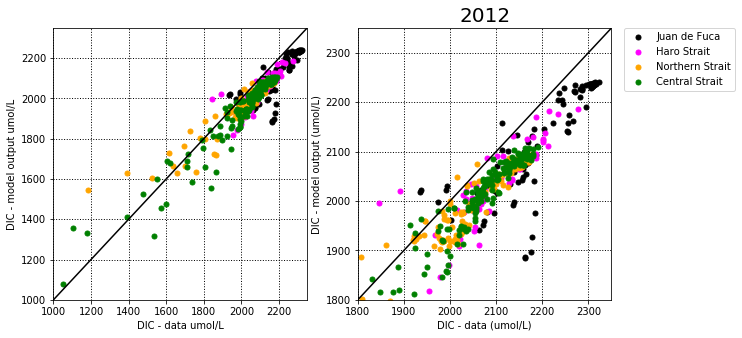

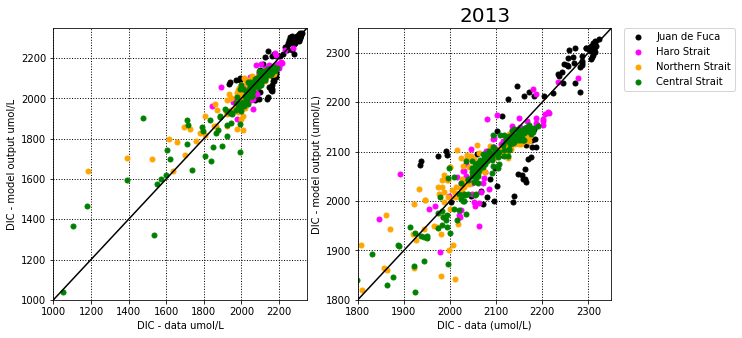

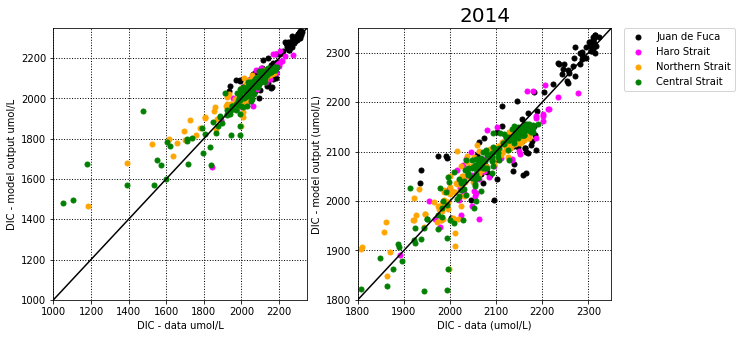

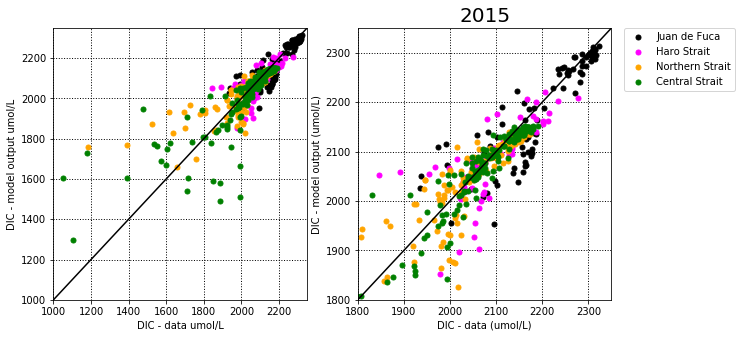

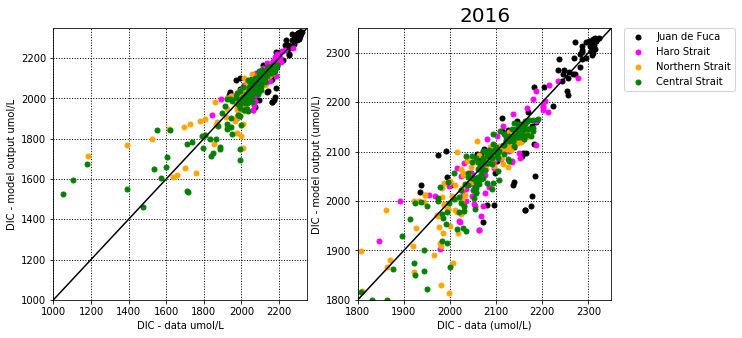

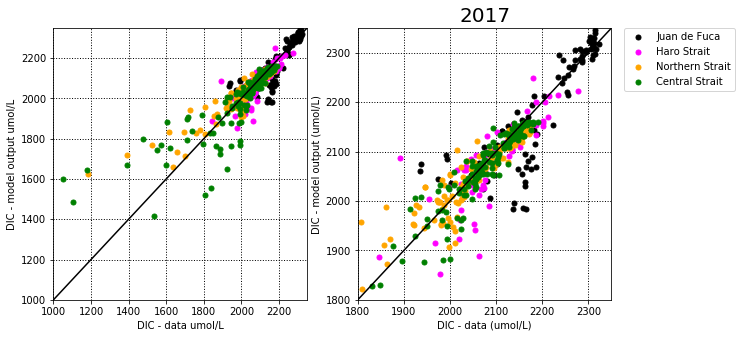

In [13]:
for yr in range(2007,2018):
    print(yr)
    tyr = str(yr)
    scrdir = './MODEL_EVAL_scripts/'
    DIC = nc.Dataset(scrdir+'/DIC_hindcast201905_GRL_comp_' + str(yr) + '.nc')

    #extractions

    DIC_mod = DIC['model_output']['mod_point'][:]
    is_ref = DIC['model_output']['mod_x'][:]
    js_ref = DIC['model_output']['mod_y'][:]


    #locations 
    loc_tag = np.zeros_like(dic)
    loc_tag[:] = 4

    for w in range(0,len(loc_tag)):
        x = is_ref[w]
        y = js_ref[w]
        #jdf is 1
        if  (x <200) & (y>220) & (y<500) :
            loc_tag[w] = 1
            #n strait
        if  (y >= 550):
            loc_tag[w] = 2
            #central strait
        if (x> 150) & (y>380) & (y<550):
            loc_tag[w] = 3
            #4 is haro/puget
        if ((x>150) & (y>320) & (y<370)):
            loc_tag[w] =4

    DIC_mod[DIC_mod==0]=np.nan

    #DIC
    dic_jdf=dic_conv[~(np.isnan(DIC_mod))&(loc_tag==1)]
    dic_haro=dic_conv[~(np.isnan(DIC_mod))&(loc_tag==4)]
    dic_ns =dic_conv[~(np.isnan(DIC_mod))&(loc_tag==2)]
    dic_cs=dic_conv[~(np.isnan(DIC_mod))&(loc_tag==3)]

    dic_MODjdf=DIC_mod[~(np.isnan(DIC_mod))&(loc_tag==1)]
    dic_MODharo=DIC_mod[~(np.isnan(DIC_mod))&(loc_tag==4)]
    dic_MODns =DIC_mod[~(np.isnan(DIC_mod))&(loc_tag==2)]
    dic_MODcs=DIC_mod[~(np.isnan(DIC_mod))&(loc_tag==3)]

    dic_compbl = dic_conv[~(np.isnan(DIC_mod))]
    DIC_mod_compbl = DIC_mod[~(np.isnan(DIC_mod))]

    #plot

    fig = plt.figure(figsize=(10,5))

    for i in range(1,3):
        if i == 1:
            ax = fig.add_subplot(1,2,i)
            ax.grid(color='k', linestyle=':', linewidth=1)
            ax.plot(dic_jdf,dic_MODjdf,'ko',markersize=5)
            ax.plot(dic_haro,dic_MODharo,c='fuchsia', marker='o',linestyle='None',markersize=5)
            ax.plot(dic_ns,dic_MODns,c='orange', marker='o',linestyle='None',markersize=5)
            ax.plot(dic_cs,dic_MODcs,c='green', marker='o',linestyle='None',markersize=5)
            #ax.plot(dic_compbl,DIC_mod_compbl,'r*',markersize=5)

            ax.set_xlabel('DIC - data umol/L')
            ax.set_ylabel('DIC - model output umol/L')
            ax.set_xlim(1000,2350)
            ax.set_ylim(1000,2350)
            ax.plot([1000,2350],[1000,2350],'k')

        if i == 2:
            ax = fig.add_subplot(1,2,i)
            ax.grid(color='k', linestyle=':', linewidth=1)
            ax.plot(dic_jdf,dic_MODjdf,'ko',markersize=5, label = 'Juan de Fuca')
            ax.plot(dic_haro,dic_MODharo,c='fuchsia', marker='o',linestyle='None',markersize=5, label = 'Haro Strait')
            ax.plot(dic_ns,dic_MODns,c='orange', marker='o',linestyle='None',markersize=5, label = 'Northern Strait')
            ax.plot(dic_cs,dic_MODcs,c='green', marker='o',linestyle='None',markersize=5, label = 'Central Strait')
            #ax.plot(dic_compbl,DIC_mod_compbl,'r*',markersize=5)

            ax.set_xlabel('DIC - data (umol/L)')
            ax.set_ylabel('DIC - model output (umol/L)')
            #ax.legend( ['Juan de Fuca','Haro Strait','Northern Strait','Central Strait'],loc='best', fontsize = 20)
            plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
            ax.set_xlim(1800,2350)
            ax.set_ylim(1800,2350)
            ax.plot([1800,2400],[1800,2400],'k')

    plt.title(str(yr), fontsize = 20)

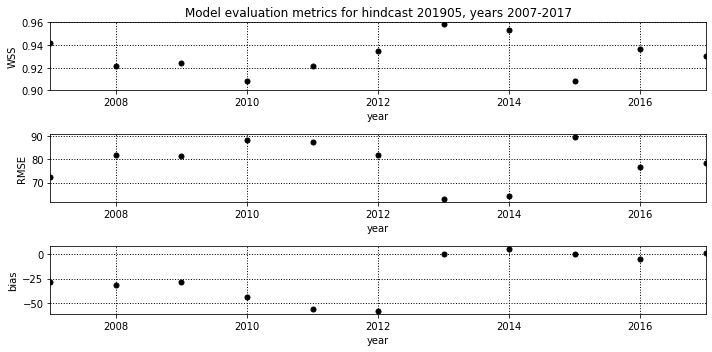

In [14]:
yrs = np.arange(2007,2018,1)

fig = plt.figure(figsize=(10,5))

for i in range(1,4):
    if i == 1:
        ax = fig.add_subplot(3,1,i)
        ax.grid(color='k', linestyle=':', linewidth=1)
        ax.plot(yrs,DIC_WSS,'ko',markersize=5)

        ax.set_xlabel('year')
        ax.set_ylabel('WSS')
        ax.set_xlim(2007,2017)
        ax.set_ylim(0.9,0.96)
        ax.set_title('Model evaluation metrics for hindcast 201905, years 2007-2017')


    if i == 2:
        ax = fig.add_subplot(3,1,i)
        ax.grid(color='k', linestyle=':', linewidth=1)
        ax.plot(yrs,DIC_RMSE,'ko',markersize=5)

        ax.set_xlabel('year')
        ax.set_ylabel('RMSE')
        ax.set_xlim(2007,2017)
        #ax.set_ylim(0.9,0.96)

    if i == 3:
        ax = fig.add_subplot(3,1,i)
        ax.grid(color='k', linestyle=':', linewidth=1)
        ax.plot(yrs, DIC_bias,'ko',markersize=5)

        ax.set_xlabel('year')
        ax.set_ylabel('bias')
        ax.set_xlim(2007,2017)
        #ax.set_ylim(0.9,0.96)

plt.tight_layout()        


In [15]:
pickle.dump(DIC_WSS, open("./pickles/DIC_WSS.pkl", 'wb'))
pickle.dump(DIC_RMSE, open("./pickles/DIC_RMSE.pkl", 'wb'))
pickle.dump(DIC_bias, open("./pickles/DIC_bias.pkl", 'wb'))
pickle.dump(DIC_modstd, open("./pickles/DIC_modstd.pkl", 'wb'))
pickle.dump(DIC_obsstd, open("./pickles/DIC_obsstd.pkl", 'wb'))

pickle.dump(DIC_WSS_over1800, open("./pickles/DIC_WSS_over1800.pkl", 'wb'))
pickle.dump(DIC_RMSE_over1800, open("./pickles/DIC_RMSE_over1800.pkl", 'wb'))
pickle.dump(DIC_bias_over1800, open("./pickles/DIC_bias_over1800.pkl", 'wb'))
pickle.dump(DIC_modstd_over1800, open("./pickles/DIC_modstd_over1800.pkl", 'wb'))
pickle.dump(DIC_obsstd_over1800, open("./pickles/DIC_obsstd_over1800.pkl", 'wb'))


FileNotFoundError: [Errno 2] No such file or directory: './pickles/DIC_WSS.pkl'

In [ ]:
for yr in range(2013,2014):
    print(yr)
    tyr = str(yr)
    scrdir = './MODEL_EVAL_scripts/'
    DIC = nc.Dataset(scrdir+'/DIC_hindcast201905_GRL_comp_' + str(yr) + '.nc')

    #extractions

    DIC_mod = DIC['model_output']['mod_point'][:]
    is_ref = DIC['model_output']['mod_x'][:]
    js_ref = DIC['model_output']['mod_y'][:]


    #locations 
    loc_DICg = np.zeros_like(dic)
    loc_DICg[:] = 4

    for w in range(0,len(loc_DICg)):
        x = is_ref[w]
        y = js_ref[w]
        #jdf is 1
        if  (x <200) & (y>220) & (y<500) :
            loc_DICg[w] = 1
            #n strait
        if  (y >= 550):
            loc_DICg[w] = 2
            #central strait
        if (x> 150) & (y>380) & (y<550):
            loc_DICg[w] = 3
            #4 is haro/puget
        if ((x>150) & (y>320) & (y<370)):
            loc_DICg[w] =4

    DIC_mod[DIC_mod==0]=np.nan

    #DIC
    DIC_jdf=dic_conv[~(np.isnan(DIC_mod))&(loc_DICg==1)]
    DIC_haro=dic_conv[~(np.isnan(DIC_mod))&(loc_DICg==4)]
    DIC_ns =dic_conv[~(np.isnan(DIC_mod))&(loc_DICg==2)]
    DIC_cs=dic_conv[~(np.isnan(DIC_mod))&(loc_DICg==3)]

    DIC_MODjdf=DIC_mod[~(np.isnan(DIC_mod))&(loc_DICg==1)]
    DIC_MODharo=DIC_mod[~(np.isnan(DIC_mod))&(loc_DICg==4)]
    DIC_MODns =DIC_mod[~(np.isnan(DIC_mod))&(loc_DICg==2)]
    DIC_MODcs=DIC_mod[~(np.isnan(DIC_mod))&(loc_DICg==3)]

    DIC_compbl = dic_conv[~(np.isnan(DIC_mod))]
    DIC_mod_compbl = DIC_mod[~(np.isnan(DIC_mod))]

    #plot
    fs = 20 
    ms = 8
    
    fig = plt.figure(figsize=(6,6))

    for i in range(1,2):


        if i == 1:
            ax = fig.add_subplot(1,1,i)
            ax.grid(color='k', linestyle=':', linewidth=1)
            ax.plot(DIC_jdf,DIC_MODjdf,'k',marker='+',linestyle='None',markersize=ms, label = 'Juan de Fuca')
            ax.plot(DIC_haro,DIC_MODharo,c='k', marker='+',linestyle='None',markersize=ms, label = 'Haro Strait')
            ax.plot(DIC_ns,DIC_MODns,c='k', marker='+',linestyle='None',markersize=ms, label = 'Northern Strait')
            ax.plot(DIC_cs,DIC_MODcs,c='k', marker='+',linestyle='None',markersize=ms, label = 'Central Strait')
            #ax.plot(DIC_compbl,DIC_mod_compbl,'r*',markersize=5)

            ax.set_xlabel('DIC - data ($\mu$mol L $^{-1}$)', fontsize = fs)
            ax.set_ylabel('DIC - model output ($\mu$mol L$^{-1}$)', fontsize = fs)
            #ax.legend( ['Juan de Fuca','Haro Strait','Northern Strait','Central Strait'],loc='best', fontsize = 20)
            #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
            ax.set_xlim(1800,2350)
            ax.set_ylim(1800,2350)
            ax.tick_params(axis='both', which='major', labelsize=15)
            ax.plot([1800,2400],[1800,2400],'k')

    plt.title('DIC model comparison, year ' + str(yr), fontsize = fs+3)